# Accuracy Analysis

In [26]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from copy import deepcopy

In [54]:
sim_path = '../../results/synth_classification_fixed_dataset_and_samples_v2/01-08-2023-14:34'

In [55]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)
runs_dirs.sort()

In [56]:
runs_dirs = ['10']

In [57]:
pre_AL_accuracy = {}
clairvoyant_final_accuracy = {}
concept_list_dict = {}
test_set = {}
weights = {}
metadata = {}

weighted_sampling_accuracy = {}
random_sampling_accuracy = {}
clairvoyant_accuracy = {}

ws_selected_samples = {}
rs_selected_samples = {}

STRATEGIES = [
    "WeightedSampling",
    "RandomSamplingV2",
    "clairvoyant"
]

for run in runs_dirs:

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata[run] = json.load(f)

    run_path = sim_path + '/' + run + '/'

    concept_list_dict[run] = []

    test_set[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'test_set.csv',
        dtype='str'
    ).astype('float64')

    weights[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'weights.csv',
        dtype='str'
    ).astype('float64')

    for n in range(metadata[run]['n_concepts']):

        # noinspection PyTypeChecker
        concept_list_dict[run].append(pd.read_csv(
            filepath_or_buffer=run_path + 'concept_' + str(n) + '.csv',
            dtype='str'
        ).astype('float64'))

    pre_AL_accuracy[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'pre_AL_accuracy.csv',
        dtype='str',
        header=None
    ).astype('float64').iloc[0, 0]

    clairvoyant_final_accuracy[run] = pd.read_csv(
        filepath_or_buffer=run_path + 'clairvoyant_final_accuracy.csv',
        dtype='str',
        header=None
    ).astype('float64').iloc[0, 0]

    weighted_sampling_accuracy[run] = {}
    random_sampling_accuracy[run] = {}
    clairvoyant_accuracy[run] = {}

    for strategy in STRATEGIES:

        strategy_path = run_path + strategy

        if strategy == 'WeightedSampling':

            ws_selected_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                dtype='str'
            ).astype('float64')

        elif strategy == 'RandomSamplingV2':
            rs_selected_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                dtype='str'
            ).astype('float64')

        for n in range(metadata[run]['n_samples']):
            n_sample = n + 1

            sample_path = strategy_path + '/' + str(n_sample) + '_samples.csv'

            if strategy == "WeightedSampling":
                weighted_sampling_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]

            elif strategy == "RandomSamplingV2":
                random_sampling_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]

            elif strategy == "clairvoyant":
                clairvoyant_accuracy[run][n_sample] = pd.read_csv(
                    filepath_or_buffer=sample_path,
                    dtype='str',
                    header=None
                ).astype('float64').iloc[0, 0]

In [58]:
def load_data(run_dirs):
    pre_AL_accuracy = {}
    clairvoyant_final_accuracy = {}
    concept_list_dict = {}
    test_set = {}
    weights = {}
    metadata = {}

    weighted_sampling_accuracy = {}
    random_sampling_accuracy = {}
    clairvoyant_accuracy = {}

    ws_selected_samples = {}
    rs_selected_samples = {}

    STRATEGIES = [
        "WeightedSampling",
        "RandomSamplingV2",
        "clairvoyant"
    ]

    for run in runs_dirs:

        with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
            metadata[run] = json.load(f)

        run_path = sim_path + '/' + run + '/'

        concept_list_dict[run] = []

        test_set[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'test_set.csv',
            dtype='str'
        ).astype('float64')

        weights[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'weights.csv',
            dtype='str'
        ).astype('float64')

        for n in range(metadata[run]['n_concepts']):

            # noinspection PyTypeChecker
            concept_list_dict[run].append(pd.read_csv(
                filepath_or_buffer=run_path + 'concept_' + str(n) + '.csv',
                dtype='str'
            ).astype('float64'))

        pre_AL_accuracy[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'pre_AL_accuracy.csv',
            dtype='str',
            header=None
        ).astype('float64').iloc[0, 0]

        clairvoyant_final_accuracy[run] = pd.read_csv(
            filepath_or_buffer=run_path + 'clairvoyant_final_accuracy.csv',
            dtype='str',
            header=None
        ).astype('float64').iloc[0, 0]

        weighted_sampling_accuracy[run] = {}
        random_sampling_accuracy[run] = {}
        clairvoyant_accuracy[run] = {}

        for strategy in STRATEGIES:

            strategy_path = run_path + strategy

            if strategy == 'WeightedSampling':

                ws_selected_samples[run] = pd.read_csv(
                    filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                    dtype='str'
                ).astype('float64')

            elif strategy == 'RandomSamplingV2':
                rs_selected_samples[run] = pd.read_csv(
                    filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                    dtype='str'
                ).astype('float64')

            for n in range(metadata[run]['n_samples']):
                n_sample = n + 1

                sample_path = strategy_path + '/' + str(n_sample) + '_samples.csv'

                if strategy == "WeightedSampling":
                    weighted_sampling_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]

                elif strategy == "RandomSamplingV2":
                    random_sampling_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]

                elif strategy == "clairvoyant":
                    clairvoyant_accuracy[run][n_sample] = pd.read_csv(
                        filepath_or_buffer=sample_path,
                        dtype='str',
                        header=None
                    ).astype('float64').iloc[0, 0]
    return pre_AL_accuracy, clairvoyant_final_accuracy, concept_list_dict, test_set, weights, metadata, weighted_sampling_accuracy, random_sampling_accuracy, clairvoyant_accuracy, ws_selected_samples, rs_selected_samples

In [59]:
import matplotlib.colors as mcolors

color_cycle = mcolors.TABLEAU_COLORS  # You can choose any color set here
color_names = list(color_cycle.keys())

n_classes = metadata[runs_dirs[0]]['n_classes']

color_list = [color_cycle[color_names[i]] for i in range(n_classes)]

### Plot Concepts

In [60]:
%%script false --no-raise-error

for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        fig, ax = plt.subplots()
        if index == len(concept_list) - 1:
            test_classes_groups = test_set[run].groupby('y_0')

            for test_index, ((test_label, test_group), (label, group))  in enumerate(zip(test_classes_groups, classes_groups)):
                ax.scatter(test_group['X_0'], test_group['X_1'], color=color_list[int(label)], alpha=0.2
                )
                ax.scatter(group['X_0'], group['X_1'], label=label, color=color_list[int(label)])
        else:
            for i, (label, group) in enumerate(classes_groups):
                ax.scatter(group['X_0'], group['X_1'], label=label, color=color_list[int(label)])



        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

In [61]:
import matplotlib.colors as mcolors

color_cycle = mcolors.TABLEAU_COLORS  # You can choose any color set here
color_names = list(color_cycle.keys())

n_classes = metadata[runs_dirs[0]]['n_classes']

color_list = [color_cycle[color_names[i]] for i in range(n_classes)]

### Plot Weighted Dataset

In [62]:
%%script false --no-raise-error


concept_size = metadata[runs_dirs[0]]['concept_size']
for (run, concept_list) in concept_list_dict.items():

    run_weights = weights[run]

    marker_size = (run_weights['weights'] - np.min(run_weights['weights'])) / (np.max(run_weights['weights']) - np.min(run_weights['weights'])) * 60
    marker_alpha = (run_weights['weights'] - np.min(run_weights['weights'])) / (np.max(run_weights['weights']) - np.min(run_weights['weights'])) * 0.8 + 0.2

    for index,concept in enumerate(concept_list[:-1]):

        start_index = index * concept_size
        end_index = (index + 1) * concept_size - 1

        concept['weights'] = run_weights.loc[start_index:end_index, 'weights']

        fig, ax = plt.subplots()

        classes = concept['y_0'].unique()
        for c in classes:

            indexes = concept.loc[concept['y_0'] == c].index
            ax.scatter(
                concept.loc[concept['y_0'] == c, 'X_0'],
                concept.loc[concept['y_0'] == c, 'X_1'],
                color=color_list[int(c)],
                label=c,
                s=marker_size.loc[indexes].tolist(),
                alpha=marker_alpha.loc[indexes].tolist()
            )



        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

### Plot Uncertainty Heatmap

In [63]:
%%script false --no-raise-error

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import entropy


for (run, concept_list) in concept_list_dict.items():
    for index, concept in enumerate(concept_list):

        if index == len(concept_list) - 1:
            X_train, X_test, y_train, y_test = train_test_split(
                concept[['X_0', 'X_1']],
                concept['y_0'],
                test_size=0.2,
                random_state=42
            )

            clf = LogisticRegression(random_state=42, solver='sag', multi_class='multinomial')
            clf.fit(X_train, y_train)

            resolution = 0.5
            x_min, x_max = concept['X_0'].min() - 0.5, concept['X_0'].max() + 0.5
            y_min, y_max = concept['X_1'].min() - 0.5, concept['X_1'].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            input_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X_0', 'X_1'])

            probabilities = clf.predict_proba(input_data)
            uncertainty_scores = np.apply_along_axis(entropy, 1, probabilities)

            uncertainty_map = uncertainty_scores.reshape(xx.shape)

            fig, ax = plt.subplots()

            heatmap = ax.imshow(uncertainty_map, cmap='coolwarm', alpha=0.8, extent=(x_min, x_max, y_min, y_max), origin='lower')
            cbar = fig.colorbar(heatmap)


            ax.set_xlabel('X_0')
            ax.set_ylabel('X_1')
            plt.title('Uncertainty Heatmap')
            plt.show()

### Computing mean and std accuracy

In [64]:
mean_pre_AL_accuracy = np.mean(
    a=list(pre_AL_accuracy.values()),
    axis=0
)
mean_pre_AL_accuracy

0.7933333333333333

In [65]:
mean_clairvoyant_accuracy = np.mean(
    a=list(clairvoyant_final_accuracy.values()),
    axis=0
)
mean_clairvoyant_accuracy

0.99

In [66]:
ws_accuracy = {}
for run in weighted_sampling_accuracy.keys():
    ws_accuracy[run] = []
    for key in weighted_sampling_accuracy[run].keys():
        ws_accuracy[run].append(weighted_sampling_accuracy[run][key])

In [67]:
rs_accuracy = {}
for run in random_sampling_accuracy.keys():
    rs_accuracy[run] = []
    for key in random_sampling_accuracy[run].keys():
        rs_accuracy[run].append(random_sampling_accuracy[run][key])

In [68]:
cl_accuracy = {}
for run in clairvoyant_accuracy.keys():
    cl_accuracy[run] = []
    for key in clairvoyant_accuracy[run].keys():
        cl_accuracy[run].append(clairvoyant_accuracy[run][key])

In [69]:
mean_ws_accuracy = np.mean(a=list(ws_accuracy.values()), axis=0)
mean_rs_accuracy = np.mean(a=list(rs_accuracy.values()), axis=0)
mean_cl_accuracy = np.mean(a=list(cl_accuracy.values()), axis=0)

In [70]:
std_ws_accuracy = np.std(a=list(ws_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
std_rs_accuracy = np.std(a=list(rs_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
std_cl_accuracy = np.std(a=list(cl_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])

### Plot results

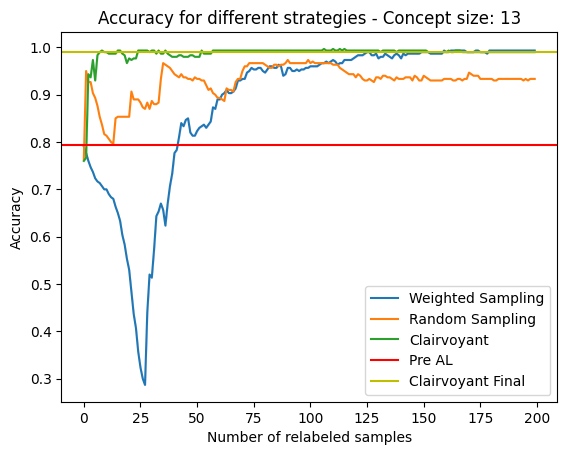

In [71]:
# create a new figure and axis object
fig, ax = plt.subplots()


# plot the accuracy values for each model as a line
ax.plot(range(len(mean_ws_accuracy)), mean_ws_accuracy, label='Weighted Sampling')
ax.plot(range(len(mean_rs_accuracy)), mean_rs_accuracy, label='Random Sampling')
ax.plot(range(len(mean_cl_accuracy)), mean_cl_accuracy, label='Clairvoyant')
ax.fill_between(range(len(mean_ws_accuracy)), mean_ws_accuracy - std_ws_accuracy, mean_ws_accuracy + std_ws_accuracy, color='blue', alpha=0.1)
ax.fill_between(range(len(mean_rs_accuracy)), mean_rs_accuracy - std_rs_accuracy, mean_rs_accuracy + std_rs_accuracy, color='orange', alpha=0.1)
ax.fill_between(range(len(mean_cl_accuracy)), mean_cl_accuracy - std_cl_accuracy, mean_cl_accuracy + std_cl_accuracy, color='green', alpha=0.1)
plt.axhline(y=mean_pre_AL_accuracy, color='r', linestyle='-', label='Pre AL')
plt.axhline(y=mean_clairvoyant_accuracy, color='y', linestyle='-', label='Clairvoyant Final')

# add a legend to the plot
ax.legend()

# set the x-axis label
ax.set_xlabel('Number of relabeled samples')

# set the y-axis label
ax.set_ylabel('Accuracy')

# set the title of the plot
ax.set_title('Accuracy for different strategies - Concept size: ' + str(metadata[runs_dirs[0]]['last_concept_size']))

# display the plot

plt.show()

### Plot Selected Samples

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
unmatched_samples = deepcopy(ws_selected_samples)

In [ ]:
for (run, concept_list) in concept_list_dict.items():
    for concept in concept_list:
        unmatched_samples[run] = pd.merge(unmatched_samples[run], concept, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
# useful to know how many samples have been relabeled with a different label
# from the original one when applying change to the select samples methods
len(unmatched_samples)

In [ ]:
for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        selected_samples_ws = pd.merge(concept, ws_selected_samples[run])
        selected_samples_rs = pd.merge(concept, rs_selected_samples[run])

        fig, ax = plt.subplots()
        for i, (label, group) in enumerate(classes_groups):
            ax.scatter(group['X_0'], group['X_1'],
                    label='Class ' + str(int(label)), color=color_list[int(label)])

            if index == len(concept_list) - 1:
                class_samples = ws_selected_samples[run].loc[ws_selected_samples[run]['y_0'] == label]
                selected_samples = pd.concat([group, class_samples], axis=0)
                ax.scatter(selected_samples['X_0'], selected_samples['X_1'], color=color_list[int(label)], alpha=0.2, marker='v')

        plt.scatter(selected_samples_ws['X_0'], selected_samples_ws['X_1'], c='black', marker='x', label='WS count: ' + str(selected_samples_ws.value_counts().count()))
        plt.scatter(selected_samples_rs['X_0'], selected_samples_rs['X_1'], c='white', marker='x', label='RS count: ' + str(selected_samples_rs.value_counts().count()))
        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

## Master Cell

In [ ]:
from itertools import product

gammas_handler = [0.1, 0.2, 0.3]
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5]

for gamma_handler, alpha, gamma in product(gammas_handler, alphas, gammas):

    # build simulation path
    sim_path = '../../results/synth_classification_fixed_dataset_and_samples_v2/22-07-2023-14:12_gamma_handler:' + str(gamma_handler) + '-alpha:' + str(alpha) + '-gamma:' + str(gamma)

    # get run dirs
    runs_dirs = get_immediate_subdirectories(sim_path)
    runs_dirs.sort()

    # load data
    pre_AL_accuracy, clairvoyant_final_accuracy, concept_list_dict, test_set, weights, metadata, weighted_sampling_accuracy, random_sampling_accuracy, clairvoyant_accuracy, ws_selected_samples, rs_selected_samples = load_data(runs_dirs)

    # compute means and stds
    mean_pre_AL_accuracy = np.mean(
    a=list(pre_AL_accuracy.values()),
    axis=0
    )

    mean_clairvoyant_accuracy = np.mean(
    a=list(clairvoyant_final_accuracy.values()),
    axis=0
    )

    ws_accuracy = {}
    for run in weighted_sampling_accuracy.keys():
        ws_accuracy[run] = []
        for key in weighted_sampling_accuracy[run].keys():
            ws_accuracy[run].append(weighted_sampling_accuracy[run][key])
    rs_accuracy = {}
    for run in random_sampling_accuracy.keys():
        rs_accuracy[run] = []
        for key in random_sampling_accuracy[run].keys():
            rs_accuracy[run].append(random_sampling_accuracy[run][key])
    cl_accuracy = {}
    for run in clairvoyant_accuracy.keys():
        cl_accuracy[run] = []
        for key in clairvoyant_accuracy[run].keys():
            cl_accuracy[run].append(clairvoyant_accuracy[run][key])

    mean_ws_accuracy = np.mean(a=list(ws_accuracy.values()), axis=0)
    mean_rs_accuracy = np.mean(a=list(rs_accuracy.values()), axis=0)
    mean_cl_accuracy = np.mean(a=list(cl_accuracy.values()), axis=0)

    std_ws_accuracy = np.std(a=list(ws_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
    std_rs_accuracy = np.std(a=list(rs_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])
    std_cl_accuracy = np.std(a=list(cl_accuracy.values()), axis=0) / np.sqrt(metadata[runs_dirs[0]]['test_set_size'])


    # plot results
    fig, ax = plt.subplots()


    # plot the accuracy values for each model as a line
    ax.plot(range(len(mean_ws_accuracy)), mean_ws_accuracy, label='Weighted Sampling')
    ax.plot(range(len(mean_rs_accuracy)), mean_rs_accuracy, label='Random Sampling')
    ax.plot(range(len(mean_cl_accuracy)), mean_cl_accuracy, label='Clairvoyant')
    ax.fill_between(range(len(mean_ws_accuracy)), mean_ws_accuracy - std_ws_accuracy, mean_ws_accuracy + std_ws_accuracy, color='blue', alpha=0.1)
    ax.fill_between(range(len(mean_rs_accuracy)), mean_rs_accuracy - std_rs_accuracy, mean_rs_accuracy + std_rs_accuracy, color='orange', alpha=0.1)
    ax.fill_between(range(len(mean_cl_accuracy)), mean_cl_accuracy - std_cl_accuracy, mean_cl_accuracy + std_cl_accuracy, color='green', alpha=0.1)
    plt.axhline(y=mean_pre_AL_accuracy, color='r', linestyle='-', label='Pre AL')
    plt.axhline(y=mean_clairvoyant_accuracy, color='y', linestyle='-', label='Clairvoyant Final')

    # add a legend to the plot
    ax.legend()

    # set the x-axis label
    ax.set_xlabel('Number of relabeled samples')

    # set the y-axis label
    ax.set_ylabel('Accuracy')

    # set the title of the plot
    ax.set_title('Accuracy for different strategies - Concept size: ' + str(metadata[runs_dirs[0]]['last_concept_size']))

    # display the plot

    plt.show()

In [ ]:
from scipy.io import arff
import pandas as pd


data = arff.loadarff('/Users/massimilianoarca/Downloads/usenet-three.arff')
df = pd.DataFrame(data[0])

print(df.head())